# Interacting Ion Channels

The giant barnacle muscle fibres contain primarily voltage gated $\text{K}^+$ and $\text{Ca}^{2+}$ currents witha a $\text{K}^+$ current that is activated by intracellular $\text{Ca}^{2+}$, $\text{K}^{+}_{\text{Ca}}$. In voltage clamp experiments, neither voltage gated channel shows significant inactivation so a different mechanism was proposed. This involes a fast activating $\text{Ca}^{2+}$ current, delayed rectifier $\text{K}^+$ current and passive leak. Experimentally, the $\text{K}_{\text{Ca}}$ current was reduced using a calcium chelater EGTA. The following model describes the experimental results

\begin{align*}
    C{dV\over dt} &= -g_{Ca} m_{\infty} (V - V_{Ca}) - g_{K}w(V - V_K) - g_L (V - V_L) + I_{app} \\
    {dw\over dt} & = {\phi(w_{\infty} - w)\over \tau}
\end{align*}

where $m_{\infty}$ is the fraction of voltage dependent $\text{Ca}^{2+}$ channels and is a function of voltage and not time. $w$ is the fractionof open $\text{K}^+$ channels. $g_{Ca}$, $g_K$ and g_L are the conductances for the $\text{Ca}^{2+}$ current, $\text{K}^+$ current and leak. The equilibrium fraction of each open channel ($\text{Ca}^{2+}$ and $\text{K}^+$) and the delayed rectifier time constant ($\tau$) is described by

\begin{align*}
    m_{\infty} &= 0.5[1 + \tanh((V - v_1)/v_2)] \\
    w_{\infty} &= 0.5[1 + \tanh((V - v_3)/v_4)] \\
    \tau &= 1/\cosh((V - v_3)/(2\cdot v_4))
\end{align*}

We solve the model equations using the following parameters (Type III)

|Paremeter      | Value |
| --------      | ----- |
|$C$            | 20 $\mu\text{F}/\text{cm}^2$   |
|$V_K$          | -84 mV |
|$g_K$          | 8 $\text{mS}/\text{cm}^2$ |
|$V_{Ca}$       | 120 mV |
|$g_{Ca} $      | 4.4 $\text{mS}/\text{cm}^2$ |
|$V_{\text{leak}}$ | -60 mV |
|$g_{\text{leak}} $ | 2 $\text{mS}/\text{cm}^2$ |
|$v_1$          | -1.2 mV |
|$v_2$          | 18 mV |
|$v_3$          | 2 mV |
|$v_4$          | 30 mV |
|$\phi$         | 0.04 $/\text{ms}$ |

In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from scipy import optimize
import numpy as np
import math
import sympy
from tabulate import tabulate

In [302]:
def morris_lecar(t, y, Iapp):
    V, w = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + math.tanh((V - v1)/v2))
    winf = 0.5 * (1 + math.tanh((V - v3)/v4))
    tau = 1/np.cosh((V - v3)/(2*v4))

    ca_cur = -1*( gCa * minf * (V - VCa))
    k_cur = -1*(gK * w * (V - VK))
    leak = -1*(gl * (V - Vl))
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap
    dwdt = phi *(winf - w)/tau

    return [dVdt, dwdt]

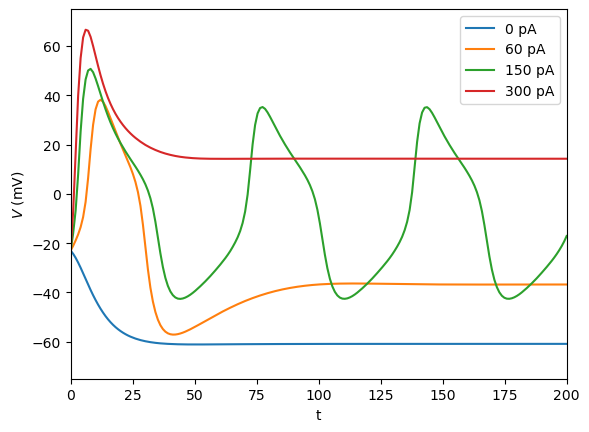

In [285]:
y0 = [-23 , 0.] #initial conditions

t = np.linspace(0, 200, 200)
test_currents = [0,60, 150, 300]
for current in test_currents:
    sol = solve_ivp(morris_lecar, [0,200], y0, args=(current,), dense_output=True)
    z = sol.sol(t)
    plt.plot(t, z.T[:,0])

plt.xlabel('t')
plt.ylabel('$V$ (mV)')
plt.xlim(0,200)
plt.ylim(-75, 75)
plt.legend([str(x) + ' pA' for x in test_currents])
plt.show()

In absence of applied current there is a stable steady-state. Increasing the curent causes transients and a new steady state. A depolarising current of 150 pA causing steady train of action potentials. For larger currents, continued spiking is lost as the giant barnacle cannot sustain continuous spiking.

## Phase Plane Analysis

Phase plane analysis ustilises a few key plot:
* Phase portraits - two variable sin the system plotted against eachother. Produces a trajectory in phase space.
* vector field - the direction a system will evolve to for any location in phase space.
* Nullclines - the values of pairs of variables at which one of the variables do not change. For the coupled system $X(x,y,t)$ and $Y(x,y,t)$, the nullclines are the solutions to $${dX\over dt} = 0, {dY\over dt} = 0$$



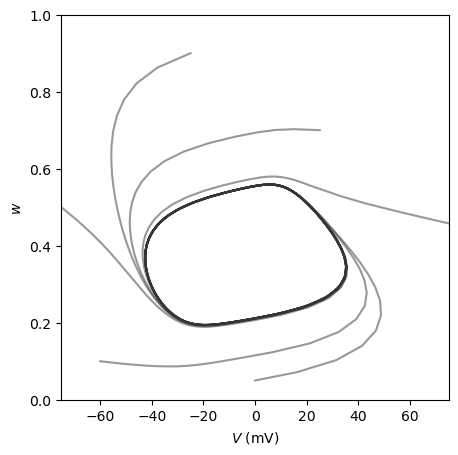

In [286]:
initail_conditions = [[-0,0.05],[-75, 0.5], [-25, 0.9], [25, 0.7], [-60,0.1], [80, 0.45]]
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
for condition in initail_conditions:
    sol = solve_ivp(morris_lecar, [0,200], condition, args=(150,), dense_output=True)
    z = sol.sol(t)
    plt.plot(z.T[:,0], z.T[:,1], color=[.2,.2,.2,.5])

plt.xlim(-75,75)
plt.ylim(0,1)
plt.xlabel('$V$ (mV)')
plt.ylabel('$w$')
plt.show()

Phase plane for the Morris-Lecar model for $I_{app} = 150\text{pA}$. The closed trajectory is a *stable limit cycle*. All trajectories converge to the stable limit cycle.

The V- and $w$-nullclines are represented as

\begin{align}
    0 &= -g_{Ca} m_{\infty} (V - V_{Ca}) - g_{K}w(V - V_K) - g_L (V - V_L) + I_{app} \\
    0 & = {\phi(w_{\infty} - w)\over \tau}
\end{align}

and plotted as such.

In [407]:
def V_nullcline(V, Iapp):
    def dV(y, V, Iapp):
        w = y
        cap = 20
        VK = -84
        gK = 8
        VCa = 120
        gCa = 4.4
        Vl = -60
        gl = 2
        v1 = -1.2
        v2 = 18
        minf = (1 + math.tanh((V - v1)/v2)) / 2
        ca_cur = -gCa * minf * (V - VCa)
        k_cur = -gK * w * (V - VK)
        leak = -gl * (V - Vl)
        dVdt = (ca_cur + k_cur + leak + Iapp)/cap
        return dVdt
    return optimize.root(dV, [0], args=(V, Iapp)).x[0]

def w_nullcline(V, Iapp):
    def dw(y, V, Iapp):
        w = y
        v3 = 2
        v4 = 30
        phi = 0.04
        winf = (1 + math.tanh((V - v3)/v4))/2
        tau = 1/math.cosh((V - v3)/(2*v4))
        dwdt = phi *(winf - w)/tau
        return dwdt
    return optimize.root(dw, [0], args=(V, Iapp)).x[0]

voltages = np.linspace(-75,75,101)

V_nullcline_data_I60 = [V_nullcline(volt,60) for volt in voltages]
V_nullcline_data_I150 = [V_nullcline(volt,150) for volt in voltages]
V_nullcline_data_I300 = [V_nullcline(volt,300) for volt in voltages]

w_nullcline_data = [w_nullcline(volt,0) for volt in voltages]

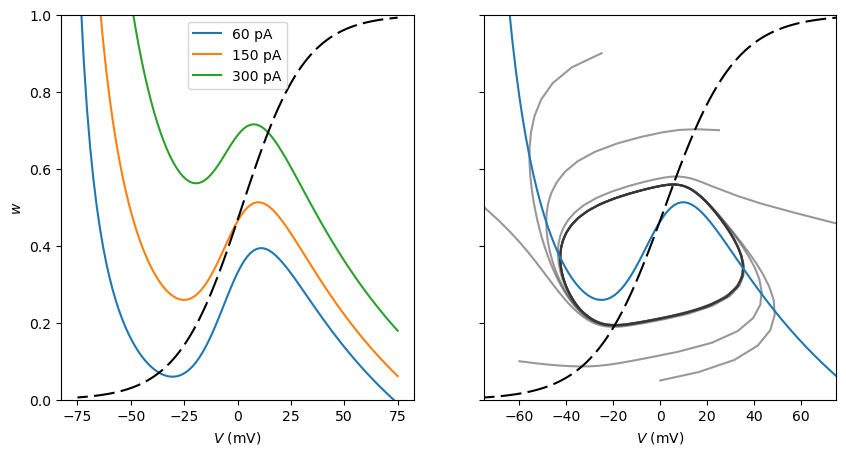

In [408]:
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(10,5)
initail_conditions = [[-0,0.05],[-75, 0.5], [-25, 0.9], [25, 0.7], [-60,0.1], [80, 0.45]]
for condition in initail_conditions:
    sol = solve_ivp(morris_lecar, [0,200], condition, args=(150,), dense_output=True)
    z = sol.sol(t)
    ax[1].plot(z.T[:,0], z.T[:,1], color=[.2,.2,.2,.5])

plt.xlim(-75,75)
plt.ylim(0,1)
ax[0].set_ylabel("$w$")
ax[0].set_xlabel('$V$ (mV)')
ax[1].set_xlabel('$V$ (mV)')

ax[0].plot(voltages, V_nullcline_data_I60)
ax[0].plot(voltages, V_nullcline_data_I150)
ax[1].plot(voltages, V_nullcline_data_I150)
ax[0].plot(voltages, V_nullcline_data_I300)

ax[0].plot(voltages, w_nullcline_data, 'black', linestyle=(5, (10, 3)))
ax[1].plot(voltages, w_nullcline_data, 'black', linestyle=(5, (10, 3)))

plt.xlim(-75,75)
plt.ylim(0,1)

ax[0].legend(['60 pA', '150 pA', '300 pA'])
plt.show()

Nullclines for the Morris-Lecar model at 60, 150 and 300 pA. The $w$-nullcline does not change with varying $I_{app}$. The intersection points at 60 and 300 pA are stable **fixed points** and represent the steady state values that the system evolves to. The intersection point at 150 pA is an unstable fxed point. The system rather oscillates around this intersection point instead of evolving to a steady state.

## Stability Analysis

Fixed points are either stable of unstable. Trajectories move towards stable fixed points while trajectories move away from unstable fixed points. The eigenvalues of the Jacobian matrix determine the stability of a system. Negative real eigenvalues indicate a stable solution, positive real eigenvalues indicate an unstable solution, complex eigenvalues indicate the presence of oscillations in the solution.

We first calculate the fixed points of the system at $I_{app}$ and then investigate the stability at that point.

In [282]:
def morris_lecar_roots(Iapp):

    def morris_lecar_eqs(y, Iapp):
        V, w = y

        cap = 20
        VK = -84
        gK = 8
        VCa = 120
        gCa = 4.4
        Vl = -60
        gl = 2
        v1 = -1.2
        v2 = 18
        v3 = 2
        v4 = 30
        phi = 0.04

        minf = 0.5 * (1 + math.tanh((V - v1)/v2))
        winf = 0.5 * (1 + math.tanh((V - v3)/v4))
        tau = 1/math.cosh((V - v3)/(2*v4))

        ca_cur = -gCa * minf * (V - VCa)
        k_cur = -gK * w * (V - VK)
        leak = -gl * (V - Vl)
        
        dVdt = (ca_cur + k_cur + leak + Iapp)/cap
        dwdt = phi *(winf - w)/tau

        return [dVdt, dwdt]

    roots = optimize.root(morris_lecar_eqs, [0,0.5], args=(Iapp,))
    #print(roots)
    return roots.x

roots = []
Iapp_list = [0,60,110,150,180,300]
for i in range(len(Iapp_list)):
    root = morris_lecar_roots(Iapp_list[i])
    roots.append([Iapp_list[i], round(root[0],3), round(root[1],3)])

print(tabulate(roots, headers=['$I_app$',"$V$","$w$"], tablefmt="github"))

|   $I_app$ |     $V$ |   $w$ |
|-----------|---------|-------|
|         0 | -60.855 | 0.015 |
|        60 | -36.755 | 0.07  |
|       110 | -19.219 | 0.196 |
|       150 |  -0.46  | 0.459 |
|       180 |   4.444 | 0.541 |
|       300 |  14.302 | 0.694 |


In [283]:
#returns the jacobian matrix for the Moris-Lecar model. Iapp is actually unnecessary and has no affect on the result as Iapp is a constant.
def morris_lecar_jacobian():
    V, w = sympy.symbols('V w')
    Iapp = 0
    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + sympy.tanh((V - v1)/v2))
    winf = 0.5 * (1 + sympy.tanh((V - v3)/v4))
    tau = 1/sympy.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap
    dwdt = phi *(winf - w)/tau

    return sympy.Matrix([dVdt, dwdt]).jacobian(sympy.Matrix([V, w]))


def morris_lecar_eig(V0, w0):
    V, w = sympy.symbols('V w')
    jac = sympy.Matrix(morris_lecar_jacobian())
    f = sympy.lambdify([V, w], jac)
    return sympy.Matrix(f(V0, w0)).eigenvals()

#arranged for printing
eig = []
for i in range(len(roots)):
    eig1, eig2 = [complex(x) for x in list(morris_lecar_eig(roots[i][1], roots[i][2]).keys())]
    eig1 = round(eig1.real,3) + round(eig1.imag,3)* 1j
    eig2 = round(eig2.real,3) + round(eig2.imag,3)* 1j
    eig.append([roots[i][0],roots[i][1], roots[i][2], eig1, eig2])

print(tabulate(eig, headers=["$I_app$","$V$","$w$","Eigenvalue","Eigenvalue"], tablefmt="github"))

|   $I_app$ |     $V$ |   $w$ | Eigenvalue      | Eigenvalue      |
|-----------|---------|-------|-----------------|-----------------|
|         0 | -60.855 | 0.015 | (-0.082-0.016j) | (-0.082+0.016j) |
|        60 | -36.755 | 0.07  | (-0.055-0.063j) | (-0.055+0.063j) |
|       110 | -19.219 | 0.196 | (0.055-0.046j)  | (0.055+0.046j)  |
|       150 |  -0.46  | 0.459 | (0.264+0j)      | (0.033+0j)      |
|       180 |   4.444 | 0.541 | (0.071-0.106j)  | (0.071+0.106j)  |
|       300 |  14.302 | 0.694 | (-0.136-0.117j) | (-0.136+0.117j) |


While the change in $I_{app}$ has no affect on the value of the eigenvalues, a change in $I_{app}$ causes a change in the location of the fixed points.

At $I_{app} of 0 and 60 mV, the fixed points are stable with eigenvalues with negative real parts. At $I_{app} = 110$ mV the eigenvalues are complex with positive real parts (unstable focus) as oscillations emerge. The oscillatins at $I_{app} = 150$ mV correspond to eigenvalues that are both real and positive (ustable node). As $I_{app} increases further the eigenvalues become complex again with positive real parts, and eventually with negative real parts.

Fixed points at which the qualitative nature of the system changes are caled *bifurcation points*. The particular bifurcationpoint in this model is a *Hopf bifurcation* which results in a stable limit cycle.

## Why Oscillations Occur

For the Morris-Lecar model, three criteria must be met for oscillatins to occur:
1. the $V$-nullcline has an inverted "N" shape;
2. a single intersection fo the $V$- and $W$-nullclines occurs between the maximum and minimum of the "N";
3. the rate of change of $V$ is much greater than $w$.

To examine this we alter the time scale at which we examine the model. $phi$ is increased 10-fold, thereby increasing the characteristic relaxation time. The rate of change in $w$ is now much slower that the rate of change in $V$. By analyzing the fast processes (change in $V$) we can treat the changes in $V$ as if $w$ were constant and so the system has the form of

\begin{equation*}
    C{dV\over dt} = -g_{Ca} m_{\infty} (V - V_{Ca}) - g_{K}w(V - V_K) - g_L (V - V_L) + I_{app}
\end{equation*}

With only voltage changeing jon this time scale we examine the dynamical behaviour with a 1D phase portrait. 

In [10]:
#for calculating the total current at a fixed w
def morris_lecar_fast_current_total(y, Iapp, w):
    V = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + math.tanh((V - v1)/v2))
    tau = 1/math.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    total_current = -(ca_cur + k_cur + leak + Iapp)

    return total_current

#for calculating the individual currents at a fixed x
def morris_lecar_fast_currents(y, Iapp, w):
    V = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + math.tanh((V - v1)/v2))
    tau = 1/math.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    total_current = -(ca_cur + k_cur + leak + Iapp)

    return [total_current, -k_cur, -ca_cur]

#for calculating a 1D vector field at a fixed w
def morris_lecar_vec_1D(y, Iapp, w):
    V = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + math.tanh((V - v1)/v2))
    tau = 1/math.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap

    return dVdt

C:\Users\User\AppData\Local\Temp\ipykernel_26352\3876868915.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  minf = 0.5 * (1 + math.tanh((V - v1)/v2))
C:\Users\User\AppData\Local\Temp\ipykernel_26352\3876868915.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tau = 1/math.cosh((V - v3)/(2*v4))


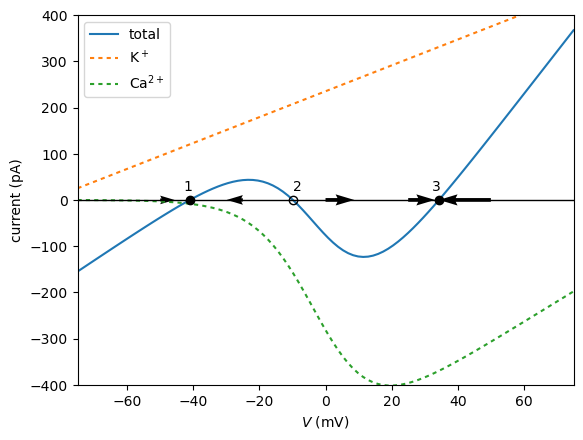

In [372]:
#calculate and plot the currents
v = np.linspace(-75,75,100)
tot_current = []
k_current = []
ca_current = []
for volt in v:
    dat = morris_lecar_fast_currents(volt, 150, 0.35)
    tot_current.append(dat[0])
    k_current.append(dat[1])
    ca_current.append(dat[2])

plt.plot(v,tot_current)
plt.plot(v,k_current, linestyle=(0,(2,2)))
plt.plot(v,ca_current, linestyle=(0,(2,2)))

#caluculate and plot the fixed points (roots). Eigenvalues determine open or closed  marker, based on stability.
roots = []
for volt in v:
    r = optimize.root(morris_lecar_fast_current_total, volt, args=(150, 0.35))
    roots.append(round(r.x[0],3))
roots = np.unique(roots)

for i in range(len(roots)):
    reals = [sympy.re(x) for x in list(morris_lecar_eig(roots[i],0.35).keys())]
    if (reals[0] > 0):
        plt.plot(roots[i],[0],'o', color=[0,0,0], mfc='none')
    if (reals[0] < 0):
        plt.plot(roots[i],[0],'o', color=[0,0,0])

#Calculate and plot trajectories around the fixed points
v_vec = np.linspace(-50,50,5)
vec = []
for volt in v_vec:
    vec.append(morris_lecar_vec_1D(volt, 150, 0.35))

plt.quiver(v_vec, 0, vec, 0)

plt.xlim(-75,75)
plt.ylim(-400,400)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('$V$ (mV)')
plt.ylabel('current (pA)')
plt.legend(['total','K${}^+$', 'Ca${}^{2+}$'])
plt.text(roots[0] -2, 20, '1')
plt.text(roots[1], 20, '2')
plt.text(roots[2] -2, 20, '3')
plt.show()

Text(600, -45, 'd')

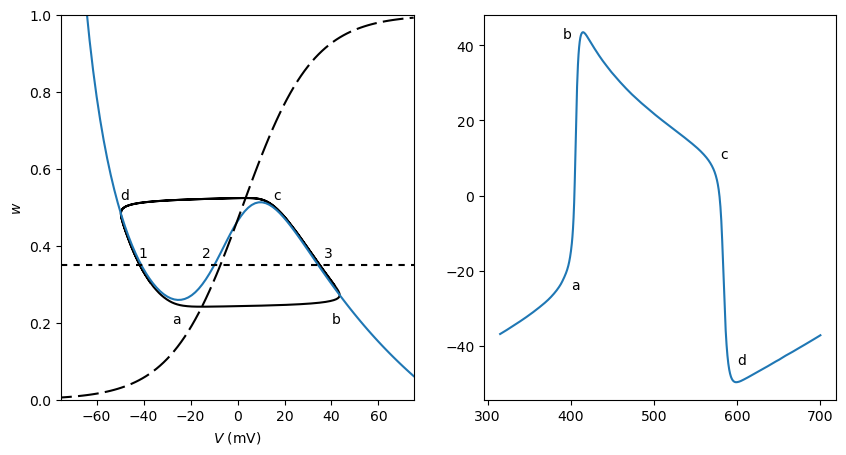

In [397]:
def morris_lecar_slow_w(t, y, Iapp):
    V, w = y

    cap = 20
    VK = -84
    gK = 8
    VCa = 120
    gCa = 4.4
    Vl = -60
    gl = 2
    v1 = -1.2
    v2 = 18
    v3 = 2
    v4 = 30
    phi = 0.04

    minf = 0.5 * (1 + np.tanh((V - v1)/v2))
    winf = 0.5 * (1 + np.tanh((V - v3)/v4))
    tau = 10*1/np.cosh((V - v3)/(2*v4))

    ca_cur = -gCa * minf * (V - VCa)
    k_cur = -gK * w * (V - VK)
    leak = -gl * (V - Vl)
    
    dVdt = (ca_cur + k_cur + leak + Iapp)/cap
    dwdt = phi *(winf - w)/tau

    return [dVdt, dwdt]

fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

t = np.linspace(0, 700, 2000)
initail_conditions = [[-23,0.251]]
for condition in initail_conditions:
    sol = solve_ivp(morris_lecar_slow_w, [0,1000], condition, args=(150,), dense_output=True)
    z = sol.sol(t)
    ax[0].plot(z.T[100:,0], z.T[100:,1], color=[0,0,0])

ax[0].set_xlim(-75,75)
ax[0].set_ylim(0,1)
ax[0].set_ylabel("$w$")
ax[0].set_xlabel('$V$ (mV)')

ax[0].plot(voltages, V_nullcline_data_I150)

ax[0].plot(voltages, w_nullcline_data, 'black', linestyle=(5, (10, 3)))

ax[0].plot([-75,75], [0.35, 0.35], 'black', linestyle=(0,(3,3)))
ax[0].text(-28, 0.2, 'a')
ax[0].text(40, 0.2, 'b')
ax[0].text(15, 0.52, 'c')
ax[0].text(-50, 0.52, 'd')
ax[0].text(-42, 0.37, '1')
ax[0].text(-15, 0.37, '2')
ax[0].text(37, 0.37, '3')

ax[1].plot(t[900:], z.T[900:,0])
ax[1].text(400, -25, 'a')
ax[1].text(390, 42, 'b')
ax[1].text(580, 10, 'c')
ax[1].text(600, -45, 'd')

The numbers in the plot correspond to the fixed points in the 1D phase plot above. The dashed horizontal line indicates where $w = 0.350$. The $V$-nullcline has a local maximum and minimum with an inverted "N" shape. With the membrane initailly polarised and at state 1, $w$ is above the $w$-nullcline, and so $w$ wil decrease and $V$ will remain close to the $V$-nullcline because it relaxes quickly. As $w$ decreased beyond the $V$-nullcline local minimum (a), $V$ relaxes quickly to the only remaining steady state at the specific $w$ (b). As $V$ relaxes to its new steady state, the $w$-nullcline is crossed. $w$ then slowly relaxes to its only remaining steady state at (c), tracking the $V$-nullcline. As the depolarised branch reaches (c) the membrane then rapidly repolarised to (d). 

The abrupt changes in polarisation are what give these oscillations the name *relaxation oscillations*. By altering the time for the $w$ component in the Morris-Lecar model, we have been able to closely resemble a *relaxation oscillator*.

## Excitablility and Action Potentials

Esxcitability is defined as when a small change is made to a system, the system returns to steady state, but when a larger perturbation is made i.e. above threshold, the perturbation causes a larger transient deviation away from the steady state.

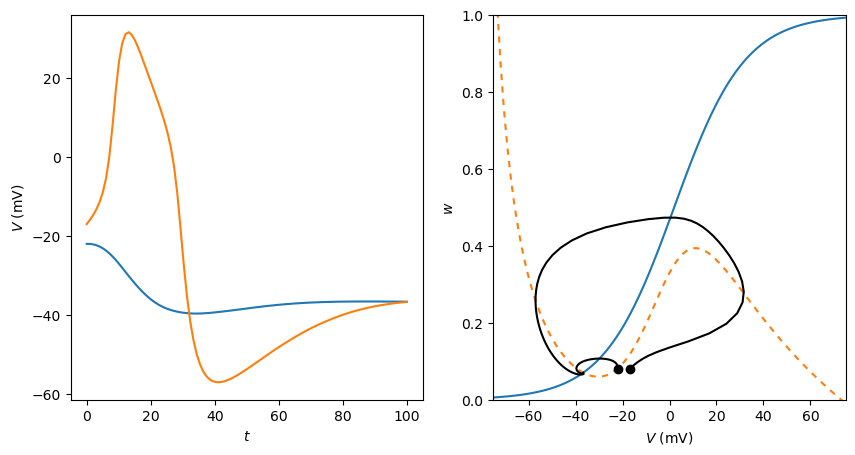

In [429]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

t = np.linspace(0, 100, 100)
initial_conditions = [[-22,0.08],[-17,0.08]]

ax[1].plot(voltages, w_nullcline_data)
ax[1].plot(voltages, V_nullcline_data_I60, linestyle=(0,(3,3)))

for condition in initial_conditions:
    sol = solve_ivp(morris_lecar, [0,100], condition, args=(60,), dense_output=True)
    z = sol.sol(t)
    ax[1].plot(z.T[:,0], z.T[:,1], color=[0,0,0])
    ax[1].plot([condition[0]],[condition[1]],'o', color=(0,0,0))
    ax[0].plot(t,z.T[:,0])

ax[1].set_xlim(-75,75)
ax[1].set_ylim(0,1)
ax[1].set_ylabel("$w$")
ax[1].set_xlabel('$V$ (mV)')
ax[0].set_ylabel('$V$ (mV)')
ax[0].set_xlabel("$t$")
plt.show()